In [6]:
import torch 
pixelsplat = torch.load('./outputs/2024-02-15/23-51-50/checkpoints/8000.ckpt',map_location=torch.device('cuda:0'))

In [2]:
pixelsplat.keys()

dict_keys(['epoch', 'global_step', 'pytorch-lightning_version', 'state_dict', 'loops', 'callbacks', 'optimizer_states', 'lr_schedulers'])

In [14]:
print(pixelsplat['state_dict'].keys())

odict_keys(['encoder.backbone.resnet_backbone.model.conv1.weight', 'encoder.backbone.resnet_backbone.model.bn1.weight', 'encoder.backbone.resnet_backbone.model.bn1.bias', 'encoder.backbone.resnet_backbone.model.bn1.running_mean', 'encoder.backbone.resnet_backbone.model.bn1.running_var', 'encoder.backbone.resnet_backbone.model.bn1.num_batches_tracked', 'encoder.backbone.resnet_backbone.model.layer1.0.conv1.weight', 'encoder.backbone.resnet_backbone.model.layer1.0.bn1.weight', 'encoder.backbone.resnet_backbone.model.layer1.0.bn1.bias', 'encoder.backbone.resnet_backbone.model.layer1.0.bn1.running_mean', 'encoder.backbone.resnet_backbone.model.layer1.0.bn1.running_var', 'encoder.backbone.resnet_backbone.model.layer1.0.bn1.num_batches_tracked', 'encoder.backbone.resnet_backbone.model.layer1.0.conv2.weight', 'encoder.backbone.resnet_backbone.model.layer1.0.bn2.weight', 'encoder.backbone.resnet_backbone.model.layer1.0.bn2.bias', 'encoder.backbone.resnet_backbone.model.layer1.0.bn2.running_mea

In [7]:
# 获取所有键的列表
keys_to_remove = [key for key in pixelsplat['state_dict'].keys() if 'dino' in key]
# 删除键
for key in keys_to_remove:
    del pixelsplat['state_dict'][key]
    
# 获取所有键的列表
keys_to_remove = [key for key in pixelsplat['state_dict'].keys() if 'global_token_mlp' in key]
# 删除键
for key in keys_to_remove:
    del pixelsplat['state_dict'][key]
    
# 获取所有键的列表
keys_to_remove = [key for key in pixelsplat['state_dict'].keys() if 'local_token_mlp' in key]
# 删除键
for key in keys_to_remove:
    del pixelsplat['state_dict'][key]

In [5]:
new_model = {}
new_model['state_dict'] = pixelsplat['state_dict']
new_model['pytorch-lightning_version'] = pixelsplat['pytorch-lightning_version']
torch.save(new_model,'./outputs/waymo_2view/8000_resnet.ckpt')


In [1]:
import numpy as np
depths = np.load("outputs/depth_room.npy")
depths = np.reshape(depths,(1,2,176,240,3))[0]

In [8]:
import torch
single_depth1 = torch.from_numpy(depths[0,:,:,0])
single_depth2 = torch.from_numpy(depths[0,:,:,1])
single_depth3 = torch.from_numpy(depths[0,:,:,2])
single_depth4 = torch.from_numpy(depths[1,:,:,0])
single_depth5 = torch.from_numpy(depths[1,:,:,1])
single_depth6 = torch.from_numpy(depths[1,:,:,2])


In [11]:
from utils_loc import img_HWC2CHW, colorize
depth_img1 = img_HWC2CHW(colorize(single_depth1, cmap_name='jet', append_cbar=True)).permute(1,2,0)
depth_img2 = img_HWC2CHW(colorize(single_depth2, cmap_name='jet', append_cbar=True)).permute(1,2,0)
depth_img3 = img_HWC2CHW(colorize(single_depth3, cmap_name='jet', append_cbar=True)).permute(1,2,0)
depth_img4 = img_HWC2CHW(colorize(single_depth4, cmap_name='jet', append_cbar=True)).permute(1,2,0)
depth_img5 = img_HWC2CHW(colorize(single_depth5, cmap_name='jet', append_cbar=True)).permute(1,2,0)
depth_img6 = img_HWC2CHW(colorize(single_depth6, cmap_name='jet', append_cbar=True)).permute(1,2,0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


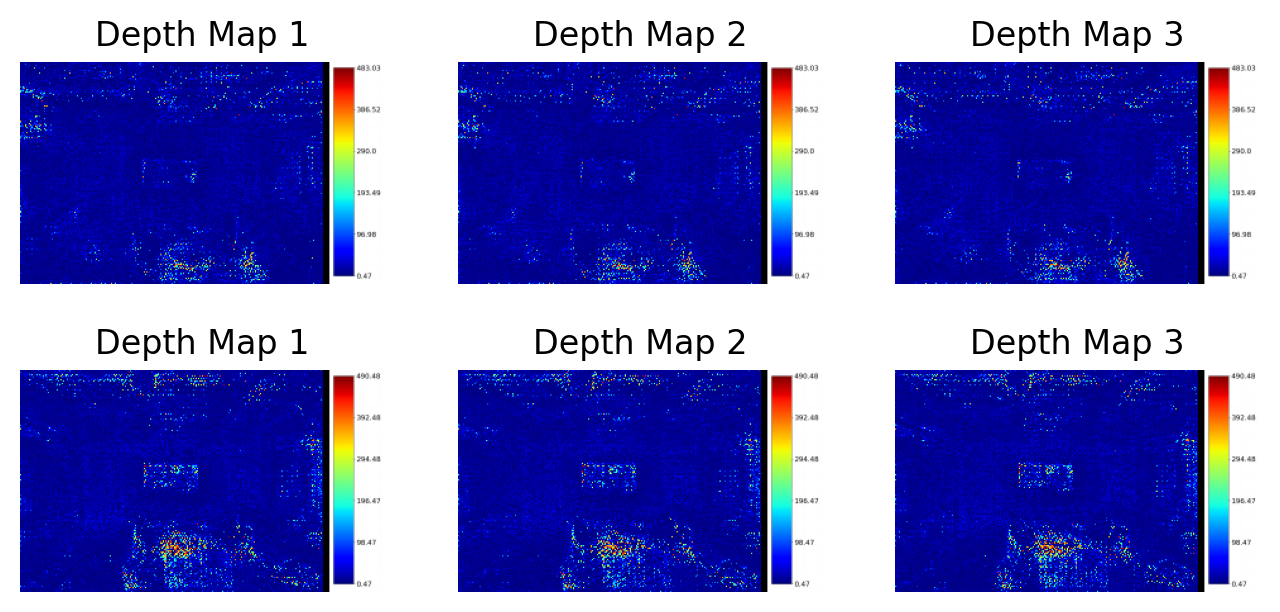

In [26]:
import matplotlib.pyplot as plt

# 创建一个6x1的子图布局
fig, axes = plt.subplots(2, 3, figsize=(8, 12), dpi=200)

# 遍历深度图数据并绘制子图
axes[0,0].imshow(depth_img1, cmap='jet');axes[0,0].set_title(f'Depth Map {1}');axes[0,0].axis('off')
axes[0,1].imshow(depth_img2, cmap='jet');axes[0,1].set_title(f'Depth Map {2}');axes[0,1].axis('off')
axes[0,2].imshow(depth_img3, cmap='jet');axes[0,2].set_title(f'Depth Map {3}');axes[0,2].axis('off')
axes[1,0].imshow(depth_img4, cmap='jet');axes[1,0].set_title(f'Depth Map {1}');axes[1,0].axis('off')
axes[1,1].imshow(depth_img5, cmap='jet');axes[1,1].set_title(f'Depth Map {2}');axes[1,1].axis('off')
axes[1,2].imshow(depth_img6, cmap='jet');axes[1,2].set_title(f'Depth Map {3}');axes[1,2].axis('off')

# 调整子图之间的间距
plt.subplots_adjust(hspace=-0.8)

# 显示图形
plt.show()

In [3]:

from plyfile import PlyData
model = PlyData.read("outputs/gaussians/room/000000.ply")
data = model.elements[0].data

In [4]:
data

memmap([(-0.36764598, 0.9207978 ,  0.30165556, 0., 0., 0.,  0.6270368 ,  0.27709085, -0.01055887, 0.1798552 , -4.385283 , -4.565297 , -4.3835206, 0.3913102 , 0.8808593 , 0.07523756, 0.25554362),
        ( 1.2646818 , 0.5817351 ,  0.9728061 , 0., 0., 0.,  0.34940594, -0.04092865, -0.4219312 , 0.30408466, -3.1666718, -3.2615626, -3.1666553, 0.45252723, 0.8269296 , 0.27358443, 0.19120155),
        ( 3.063443  , 0.19328077,  1.717381  , 0., 0., 0.,  0.6372228 ,  0.32269806, -0.04011466, 0.3330651 , -2.5911973, -2.5911984, -2.5911975, 0.36772412, 0.8034065 , 0.45749587, 0.10007269),
        ...,
        (-0.8731255 , 0.03519807, -0.33677107, 0., 0., 0., -1.0658541 , -1.1217717 , -1.3160621 , 0.12679432, -4.035254 , -5.0948186, -4.191423 , 0.39454415, 0.40995216, 0.5896776 , 0.5731967 ),
        (-0.9398752 , 0.31263223, -0.21230383, 0., 0., 0., -0.8556837 , -1.0373422 , -1.239409  , 0.20383279, -4.36819  , -4.7224474, -4.504862 , 0.60312986, 0.7107681 , 0.27412325, 0.23643066),
        (-0.